# Fall 2023 - Final Project - GF180 MPW Shuttle Submission

## Verilog - Part 1

<b>Lecture Date:</b> 12/1/2023

<b>Final Project Due (to Get on the Shuttle):</b> <font color="red"><b>12/11/23 at 6:00pm</b></font><br>
<b>Final Project Due (for course credit):</b> <font color="red"><b>12/14/23 at 6:00pm</b></font><br>

### Getting Started

<b>1) Open your PuTTY Terminal and Log into Cadence as normal</b>

    cd esc-courses/fa23-cse-30342.01/dropbox/
    tcsh
    source cadence_nd.sh
    cd VLSI/Verilog

<b>2) Test the success of your startup</b>

    which irun
    /escnfs/home/csesoft/cadence/installs/INCISIVE152/tools.lnx86/bin/irun

### Verilog-2001 vs. Verilog 1995

The key element of Verilog is that the description is independent of the implementation. You may delay the choice of implementation technology, make architectural and functional changes, and more easily adapt the design to future project.

As an example, let’s discuss the design of a full adder From Verilog 1995:

    module halfadd (a,b,sum,carry);
        input a,b;
        output sum, carry;
        assign sum = a ^ b; 
        assign carry = a & b;
    endmodule

Verilog-2001 allowed the definition of ports inside the instantiation 

    module halfadd (input a, b, output sum, carry);

        assign sum = a ^ b; 

        assign carry = a & b;

    endmodule

And here is a Full Adder Based on a Half Adder

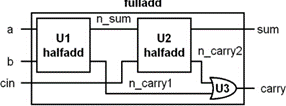

### Running a Full Adder Script

Perform wget and obtain these three files:

    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/fa.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/fa_stim.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/fa_driver.v
    
    
We will write the module for <code>fa.v</code>
    
To get the numeric output, perform the command:

    irun fa.v fa_stim.v fa_driver.v
    
And to get the SimVision

    irun -access +r -gui fa.v fa_stim.v fa_driver.v
    
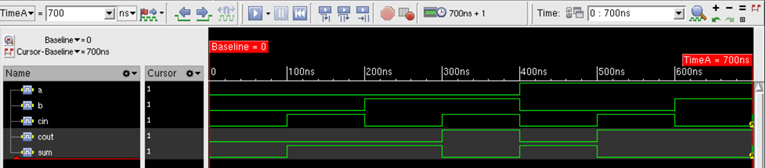
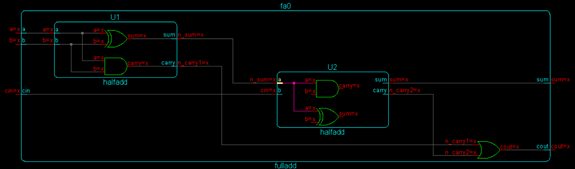

### Parameters

<b>Parameters</b> - a constant value declared within the module structure

The value can be used to define a set of attributes for the module which can characterize its behavior as well as its physical representation.

Parameters can be use for vector widths:

    module shift (shiftOut, dataIn, shiftCount); 
        parameter width = 32;
    
        output [width-1:0] shiftOut; 
        input [width-1:0] dataIn; 
        input [31:0] shiftCount;

        assign shiftOut = dataIn << shiftCount; 
        
    endmodule


#### Design a Multiplexor with the following dimensions. Write Verilog module and testbench

Solution: 

    touch multiplexor.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/multiplexor_stim.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/multiplexor_driver.v

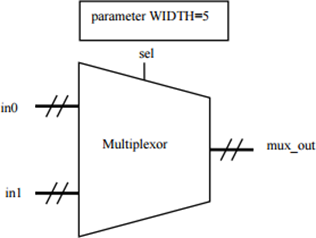

But now we can take advantage of Widths. Open multiplexor.v.

And here is the multiplexor run result:

    > irun multiplexor.v multiplexor_test.v
    ncsim> run
    At time 1 sel=0 in0=10101 in1=00011, mux_out=10101
    At time 2 sel=0 in0=01010 in1=11100, mux_out=01010
    At time 3 sel=1 in0=00001 in1=10101, mux_out=10101
    At time 4 sel=1 in0=10101 in1=01010, mux_out=01010
    TEST PASSED
    Simulation complete via $finish(1) at time 4 NS + 0
    
And here is the Schematic Tracer

    irun -access +r -gui multiplexor.v multiplexor_test.v


### ALU Design and Synthesis

Develop a Verilog module ALU with the following parameters and instructions

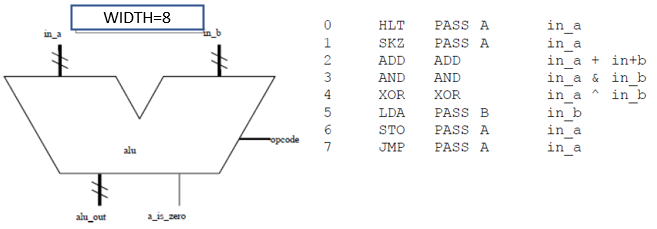

For simplicity, and to prevent for conflicting with your already synthesized ALU, we will design calling this <code>alu_2.v</code>

    touch alu.v

To represent local parameters, we will perform the folllwing:

    localparam PASS0=0, PASS1=1, ADD=2, AND=3, XOR=4, PASSB=5, STO=6, JMP=7;

To test, perform the command:

    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec37/alu_2_test.v
    
Then we will perform the test with:

    irun alu_2.v alu_2_test.v

## Controller

Let's study a Verilog description of a MIPS 8-bit Multicycle CPU 

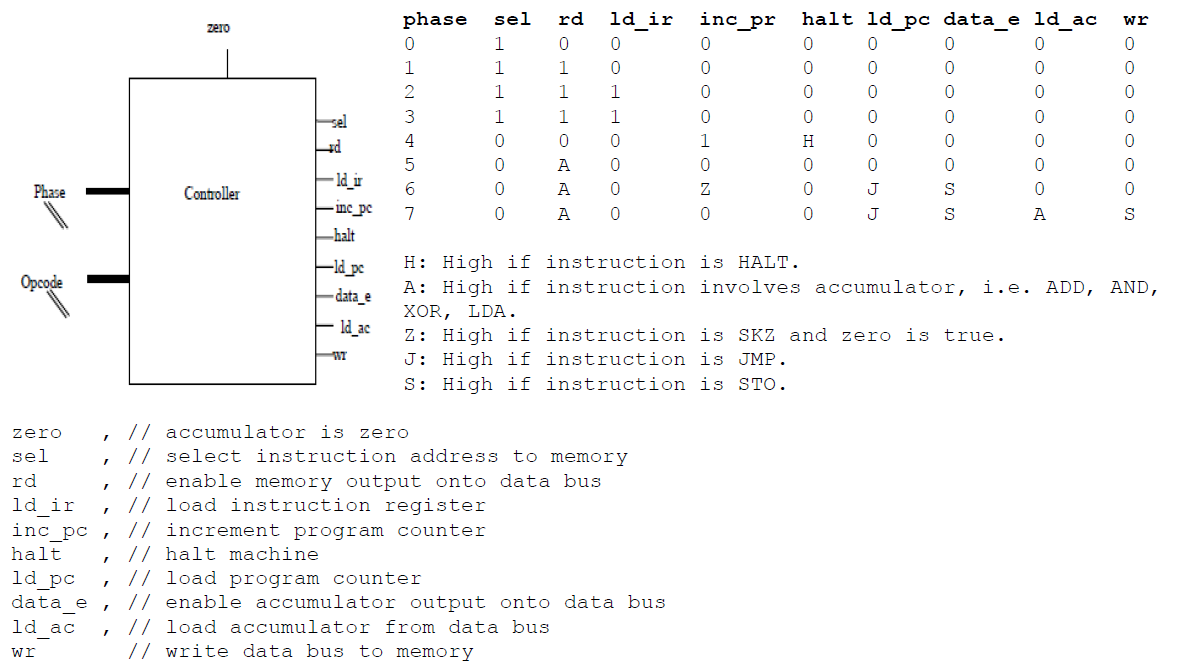

We will use a <code>reg</code> to save an intermediate output, similar to using a Flip-Flip to store intermediate stages.

    module controller
    (
      input  wire [2:0] opcode ,
      input  wire [2:0] phase  ,
      input  wire       zero   , // accumulator is zero
      output reg        sel    , // select instruction address to memory
      output reg        rd     , // enable memory output onto data bus
      output reg        ld_ir  , // load instruction register
      output reg        inc_pc , // increment program counter
      output reg        halt   , // halt machine
      output reg        ld_pc  , // load program counter
      output reg        data_e , // enable accumulator output onto data bus
      output reg        ld_ac  , // load accumulator from data bus
      output reg        wr       // write data bus to memory
    );

      localparam integer HLT=0, SKZ=1, ADD=2, AND=3, XOR=4, LDA=5, STO=6, JMP=7;

      reg H,A,Z,J,S;

      always @* begin
          H = (opcode == HLT);
          A = (opcode == ADD || opcode == AND || opcode == XOR || opcode == LDA);
          Z = (opcode == SKZ && zero);
          J = (opcode == JMP);
          S = (opcode == STO);
          case ( phase )
      0:begin sel=1;rd=0;ld_ir=0;inc_pc=0;halt=0;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      1:begin sel=1;rd=1;ld_ir=0;inc_pc=0;halt=0;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      2:begin sel=1;rd=1;ld_ir=1;inc_pc=0;halt=0;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      3:begin sel=1;rd=1;ld_ir=1;inc_pc=0;halt=0;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      4:begin sel=0;rd=0;ld_ir=0;inc_pc=1;halt=H;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      5:begin sel=0;rd=A;ld_ir=0;inc_pc=0;halt=0;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      6:begin sel=0;rd=A;ld_ir=0;inc_pc=Z;halt=0;ld_pc=J;data_e=S;ld_ac=0;wr=0;end
      7:begin sel=0;rd=A;ld_ir=0;inc_pc=0;halt=0;ld_pc=J;data_e=S;ld_ac=A;wr=S;end
          endcase
        end
    endmodule
    
To run and test:

    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/controller.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/controller_test.v
    
    irun controller.v controller_test.v

## Blocking Assignments in Sequential Procedures

A challenge: Blocking assignments can lead to race conditions, specifically when the same event triggers multiple procedures.

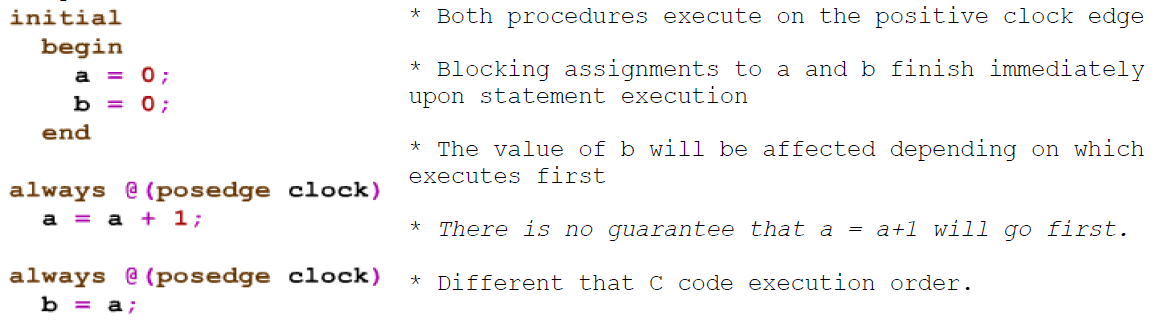

### The Blocking Assignment Order Affects Functionality

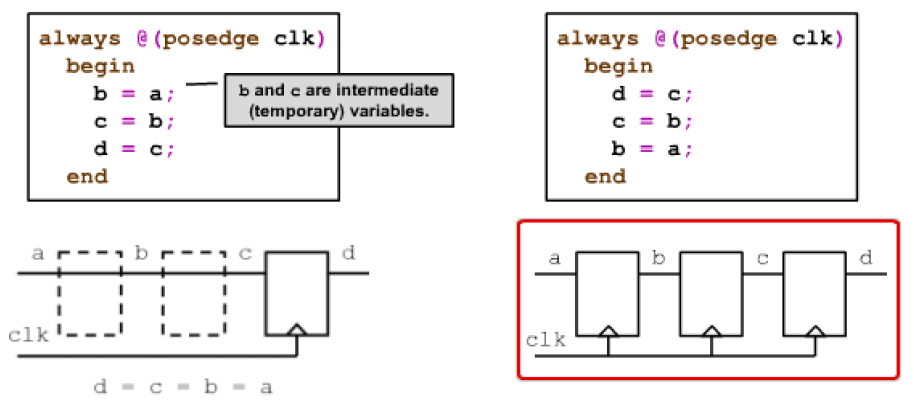

### Non-Blocking Statements

A nonblocking assignment schedules completion and does not block
• By default, completes when all executing blocks have been blocked

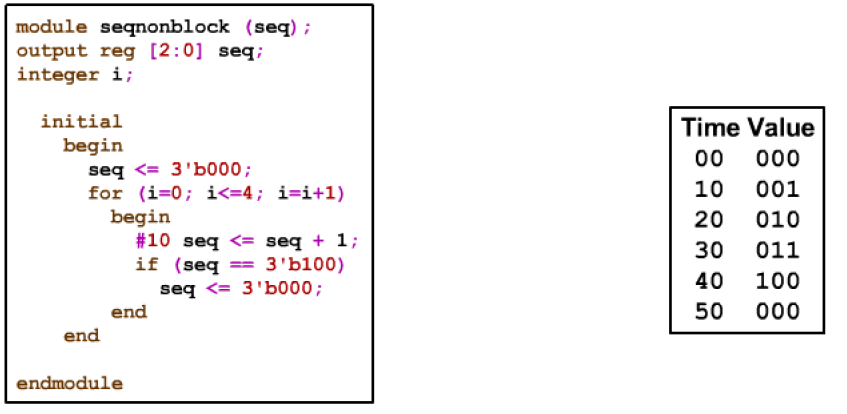

### We've already seen this!

Recall from our <a href = "https://raw.githubusercontent.com/mmorri22/cse30342/main/lec37/nand2_stim.v">nand2_stim.v</a> that we designed together:

    module nand2_Stim(A, B); 

        output A, B;

        parameter delay = 100; // Delay

        // Used for creating two-input binary test 
        reg [1:0] cnt;

        initial begin
            cnt = 0;
            // repeat (3) means do the function 4 times
            // Similar: for(i=0; i < 4; i++) 
            repeat (3) begin
                #delay cnt=cnt+1; /*** NON-BLOCKING STATEMENT *****/
            end
        end

        // Automaticaly convert 'cnt' this to binary
        // 0 -> A = '0', B = '0'
        // 1 -> A = '0', B = '1'... and so on. 
        assign {A,B} = cnt;

    endmodule
    
### Can Nonblocking Assignment Order Affect Functionality

Nonblocking Assignment order of appearance cannot affect functionality if:
<ul>
    <li>Statements are executed in the same simulation cycle</li>
    <li>Each target is assigned only once</li>
    <li>No target is assigned in any other procedural block</li>
    <li>No blocking assignments are mixed with the nonblocking assignments</li>
</ul>

## Example: A Register using Non-Blocking Statements

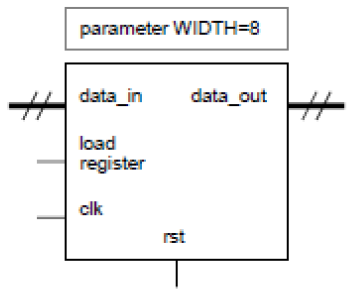

Start with the parameters:

    module register
    #(
        parameter integer WIDTH=8
    )
    (
        input wire clk ,
        input wire rst ,
        input wire load ,
        input wire [WIDTH-1:0] data_in,
        output reg [WIDTH-1:0] data_out
    );
    
We will define the positive edge clock to change the data_out to data_in. We also will reset where the output is 0. Otherwise, the output will stay the same:

    always @(posedge clk)
        if ( rst ) 
            data_out <= 0; 
        else if ( load ) 
            data_out <= data_in;
        else 
            data_out <= data_out;
    endmodule
    
To run the example:

    https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/register_test.v
    
    irun register.v register_test.v

### Using Continuous & Procedural Assignments

Multiple Continuous assignments to a single net are “wired together”. 

#### Combinational Feedback Loops – Be Careful!

Zero-delay feedback loops may cause the simulator to appear to “lock up”
• The process never finished or suspends
• The simulator never gets to do anything else

Here is a short feedback loop deliberately generating a clock
• A continuous assignment is its own process. Whenever clk_out changes, the value is updated continuously

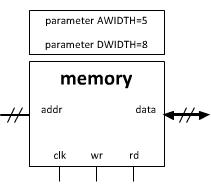

5-bit input gives a 32-bit output
In this case, the 5-bit input still has 32 memory elements, but is for an 8-bit register instead of a 32 bit register.

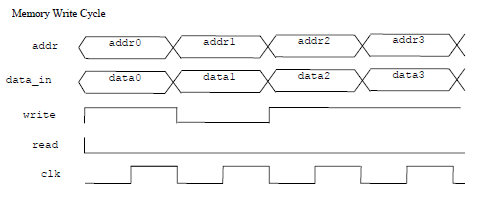

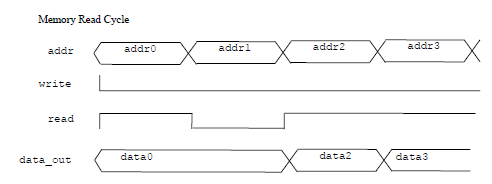

Perform the following commands:

    touch memory.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/memory_test.v

## Building the Final Reduced Instruction Set Computer

This is the final RISC computer you will be designing and simulating. This puts all the pieces together.

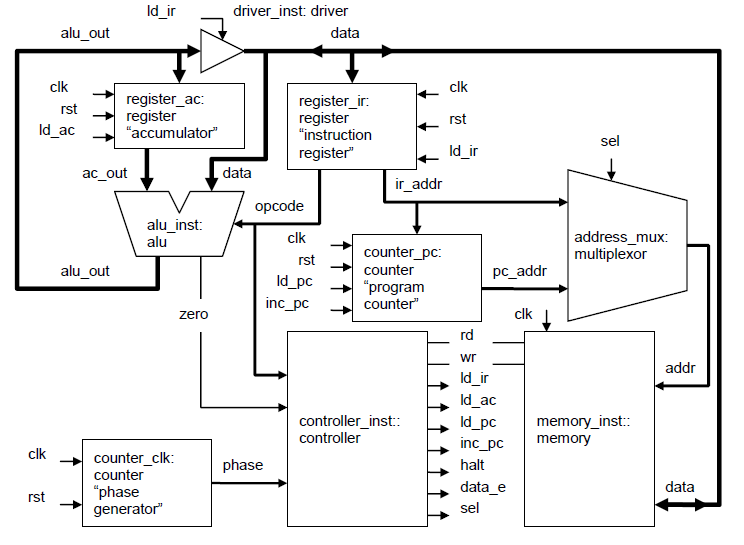


To obtain all the files, run the following command:

    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/risc_setup.sh
    
You will download all the correct files for the alu, controller, memory, register, and driver code, as well as a file (files.txt) which will allow you to run irun with all the code:

    irun -f files.txt
    
    irun -access +r -gui -f files.txt